In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
PATH = 'C://Users/User/Desktop/'
df = pd.read_csv(PATH + 'fcc-forum-pageviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [13]:
df['date'] = pd.to_datetime(df['date'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [16]:
df.set_index('date', inplace=True)
df.info()

KeyError: "None of ['date'] are in the columns"

In [27]:
df['value'] = df[ df['value'] >= df['value'].quantile(0.025) ]
df

,value
date,
2016-05-09,NaN
2016-05-10,NaN
2016-05-11,NaN
2016-05-12,NaN
2016-05-13,NaN
...,...
2019-11-29,171584.0
2019-11-30,141161.0
2019-12-01,142918.0


In [28]:
df['value'] = df[ df['value'] <= df['value'].quantile(0.975) ]
df

,value
date,
2016-05-09,NaN
2016-05-10,NaN
2016-05-11,NaN
2016-05-12,NaN
2016-05-13,NaN
...,...
2019-11-29,171584.0
2019-11-30,141161.0
2019-12-01,142918.0


In [95]:
def draw_line_plot():
    
    def fig():
        plt.figure(figsize=(12, 5))
        plt.plot(df['value'], color='red',linewidth=0.8)
        plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
        plt.xlabel('Date')
        plt.ylabel('Page Views')
    
    fig = fig()
    
    return fig

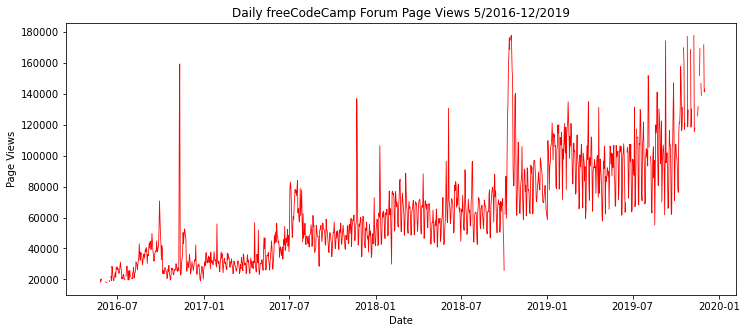

In [96]:
draw_line_plot()

In [84]:
def draw_bar_plot():
    df_bar = df.copy()

    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
        # create two new columns in new df so we can group

    df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
        # groupby by year, then month. For each month, average.
    df_bar = df_bar.unstack()
        # magic line that separate all months

    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig = df_bar.plot(kind= 'bar', figsize = (12, 8), 
                      colormap= 'ocean')

    plt.title('')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    lg = plt.legend(title= 'Months', fontsize = 10, labels = month_names, facecolor= 'pink')
    
    return fig

<AxesSubplot:xlabel='Years', ylabel='Average Page Views'>

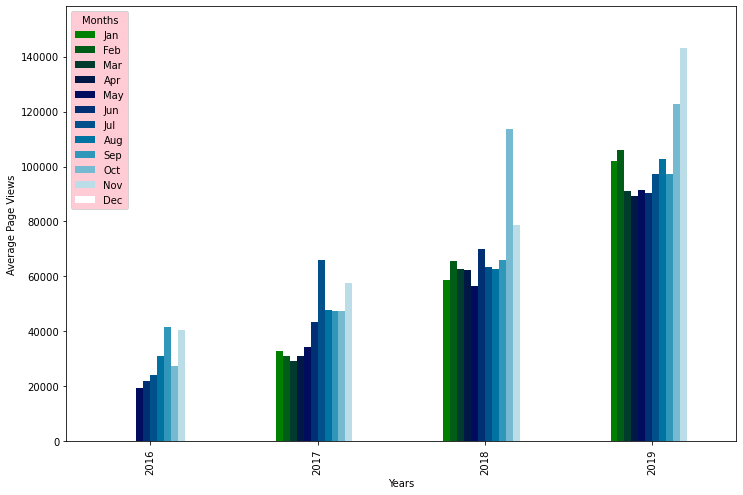

In [97]:
draw_bar_plot()

In [100]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box

,date,value,year,month
0,2016-05-09,NaN,2016,May
1,2016-05-10,NaN,2016,May
2,2016-05-11,NaN,2016,May
3,2016-05-12,NaN,2016,May
4,2016-05-13,NaN,2016,May
...,...,...,...,...
1299,2019-11-29,171584.0,2019,Nov
1300,2019-11-30,141161.0,2019,Nov
1301,2019-12-01,142918.0,2019,Dec
1302,2019-12-02,NaN,2019,Dec


Text(0.5, 1.0, 'Year-wise Box Plot (Trend)')

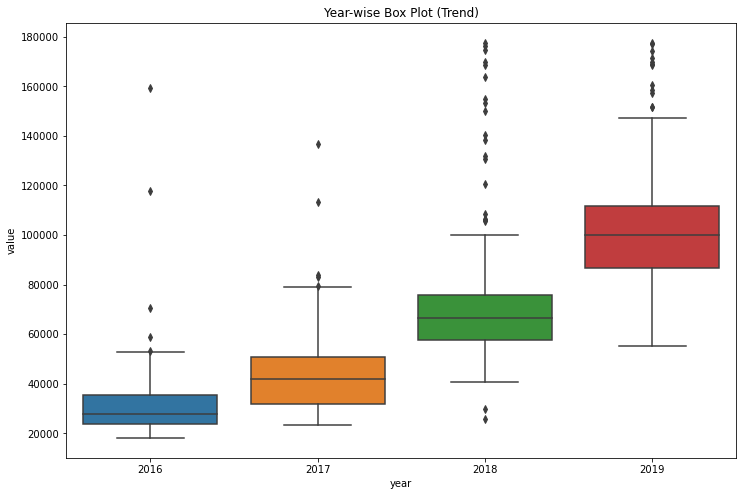

In [109]:
plt.figure(figsize=(12,8))
plt1= sns.boxplot(data= df_box, x= 'year' , y='value')
plt1.set_title( 'Year-wise Box Plot (Trend)' )

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

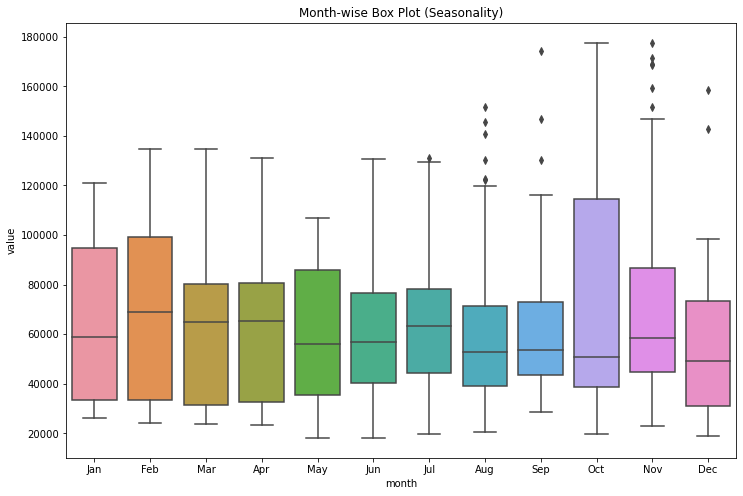

In [112]:
plt.figure(figsize=(12,8))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt2= sns.boxplot(data= df_box, x= 'month' , y='value', order= month_names)
plt2.set_title( 'Month-wise Box Plot (Seasonality)' )

In [130]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    # draw box plot
    def fig():
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (16, 6) )

        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

        plt1 = sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
        plt1.set_title( 'Year-wise Box Plot (Trend)' )

        plt2 = sns.boxplot(data=df_box, x='month', y='value', order = month_names, ax=ax2)
        plt2.set_title( 'Month-wise Box Plot (Seasonality)' )
        
    fig = fig()
    
    return fig

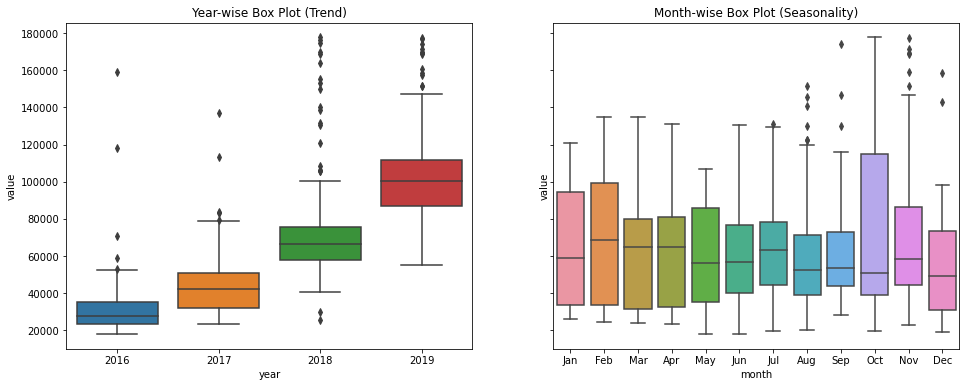

In [131]:
draw_box_plot()